# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")
print(len(df))
df.head(10)

1715


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,3410440.0,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.dropna(axis=1, how='all', inplace=True)
df.dropna(axis=0, how='all', inplace=True)
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: **Grade 4 Math**

How many years of data are logged in our dataset? 

In [4]:
df['YEAR'].max() - df['YEAR'].min()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
df['STATE'].unique()
mich = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean()
ohio = df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean()

print(f"Michigan with {mich}") if mich > ohio else (print(f"Ohio with {ohio}") if mich < ohio else print(f"Draw"))

Ohio with 239.45454545454547


Find the average for your chosen test across all states in 2019

In [6]:
df[df['YEAR'] == 2019][['STATE', 'AVG_MATH_4_SCORE']].groupby('STATE').agg('mean')

,AVG_MATH_4_SCORE
STATE,
ALABAMA,230.0
ALASKA,232.0
ARIZONA,238.0
ARKANSAS,233.0
CALIFORNIA,235.0
COLORADO,242.0
CONNECTICUT,243.0
DELAWARE,239.0
DISTRICT_OF_COLUMBIA,235.0


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
df[['STATE', 'AVG_MATH_4_SCORE']].groupby('STATE').agg('max')

,AVG_MATH_4_SCORE
STATE,
ALABAMA,233.0
ALASKA,237.0
ARIZONA,240.0
ARKANSAS,240.0
CALIFORNIA,235.0
COLORADO,247.0
CONNECTICUT,245.0
DELAWARE,243.0
DISTRICT_OF_COLUMBIA,235.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
# money on money features
df["PERCENT_SPENT"] = df["TOTAL_EXPENDITURE"] / df["TOTAL_REVENUE"]
df["SUPPORT_SERVICES_RATIO"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["TOTAL_REVENUE"]
df["INSTRUCTION_RATIO"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_REVENUE"]
df["OTHER_RATIO"] = df["OTHER_EXPENDITURE"] / df["TOTAL_REVENUE"]
df["CAPTIAL_OUTLAY_RATIO"] = df["CAPITAL_OUTLAY_EXPENDITURE"] / df["TOTAL_REVENUE"]

# scaling
df["YEAR_MIN_MAX"] = (df["YEAR"].max() - df["YEAR"]) / (df["YEAR"].max() - df["YEAR"].min())

# money spent on 4th graders
df["MONEY_PER_4_G"] = df["GRADES_4_G"] / df["TOTAL_EXPENDITURE"]
df["INSTRUCTION_PER_4G"] = df["GRADES_4_G"] / df["INSTRUCTION_EXPENDITURE"]
df["SUPPORT_SERVICES_PER_4G"] = df["GRADES_4_G"] / df["SUPPORT_SERVICES_EXPENDITURE"]
df["OTHER_PER_4G"] = df["GRADES_4_G"] / df["OTHER_EXPENDITURE"]
df["CAPITAL_OUTLAY_PER_4G"] = df["GRADES_4_G"] / df["CAPITAL_OUTLAY_EXPENDITURE"]

Feature engineering justification: 

**A couple things on the divisions, I want to see if there is anything clear in any of them. For example if a higher ratio of any sort of spending is correlated with a higher grade 4 math score.**

**The min/max scaler is for the model, which I don't completely remember is important to do for something like this.**

**I also continued to make ratios of 4th graders per money expended because: a) we are curious about 4th graders so they are the population of interest; b) how much money spent impacts them which impacts grades. At least this is the thought process behind these features.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

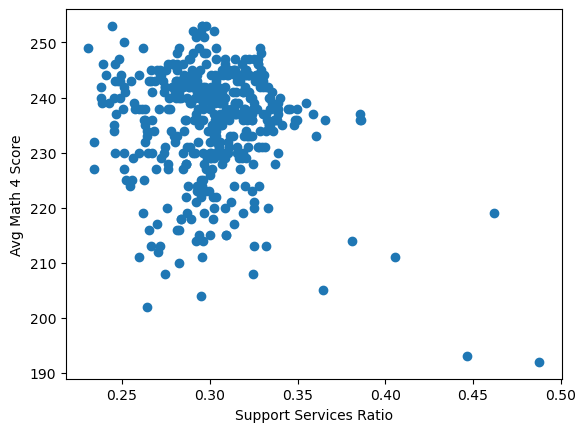

In [9]:
plt.scatter(df["SUPPORT_SERVICES_RATIO"], df["AVG_MATH_4_SCORE"]);
plt.xlabel('Support Services Ratio')
plt.ylabel('Avg Math 4 Score')
plt.show()

**The ratio of support serverices spent vs the response variable we see there is a little negative correlation. It's not perfect but we can see it a litte. Towards the beginning of the ratio we see a cloud of points that are jumbled up, presumably because so much of this expense is spent the same amount around every year.**

**Visualization 2**

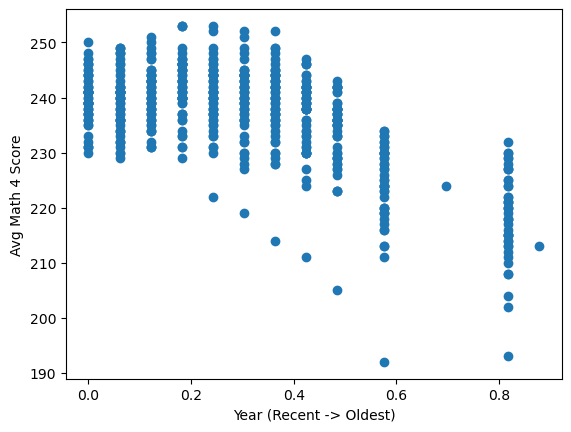

In [10]:
plt.scatter(df["YEAR_MIN_MAX"], df["AVG_MATH_4_SCORE"])
plt.xlabel('Year (Recent -> Oldest)')
plt.ylabel('Avg Math 4 Score')
plt.show()

**Again we see a negative correlation with the min/max of the year column ploted with the response variable. The correct way to interpret this with the raw year data is that there is a positive correlation due to the left of the x-axis being more recent years and the right being older years.**

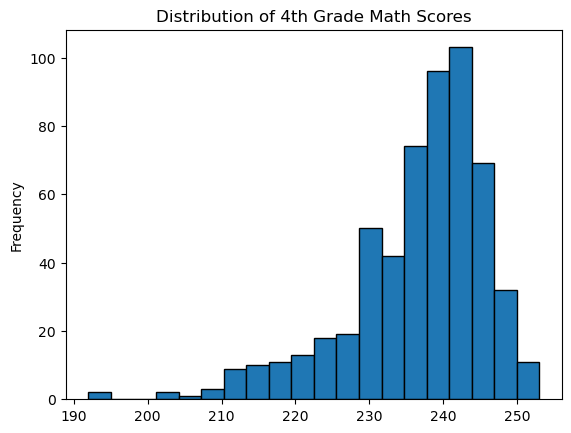

In [11]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black", bins=20);

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'PERCENT_SPENT',
       'SUPPORT_SERVICES_RATIO', 'INSTRUCTION_RATIO', 'OTHER_RATIO',
       'CAPTIAL_OUTLAY_RATIO', 'YEAR_MIN_MAX', 'MONEY_PER_4_G',
       'INSTRUCTION_PER_4G', 'SUPPORT_SERVICES_PER_4G', 'OTHER_PER_4G',
       'CAPITAL_OUTLAY_PER_4G'],
      dtype='object')

In [61]:
X_col = [
    'ENROLL', 'TOTAL_REVENUE',
    'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
    'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
    'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
    'CAPITAL_OUTLAY_EXPENDITURE',
    'GRADES_4_G', 'GRADES_ALL_G', 'AVG_MATH_8_SCORE', 'PERCENT_SPENT',
    'SUPPORT_SERVICES_RATIO', 'INSTRUCTION_RATIO', 'OTHER_RATIO',
    'CAPTIAL_OUTLAY_RATIO', 'YEAR_MIN_MAX', 'MONEY_PER_4_G',
    'INSTRUCTION_PER_4G', 'SUPPORT_SERVICES_PER_4G', 'OTHER_PER_4G',
    'CAPITAL_OUTLAY_PER_4G'  
]

In [62]:
X = df[X_col].dropna()
y = df.loc[X.index]["AVG_MATH_4_SCORE"]
y.fillna(y.median(), inplace=True)
print(len(X))

397


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [64]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [65]:
# create your model here
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [68]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

11.959293942249595
0.8665592463694988
2.692737152774637


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

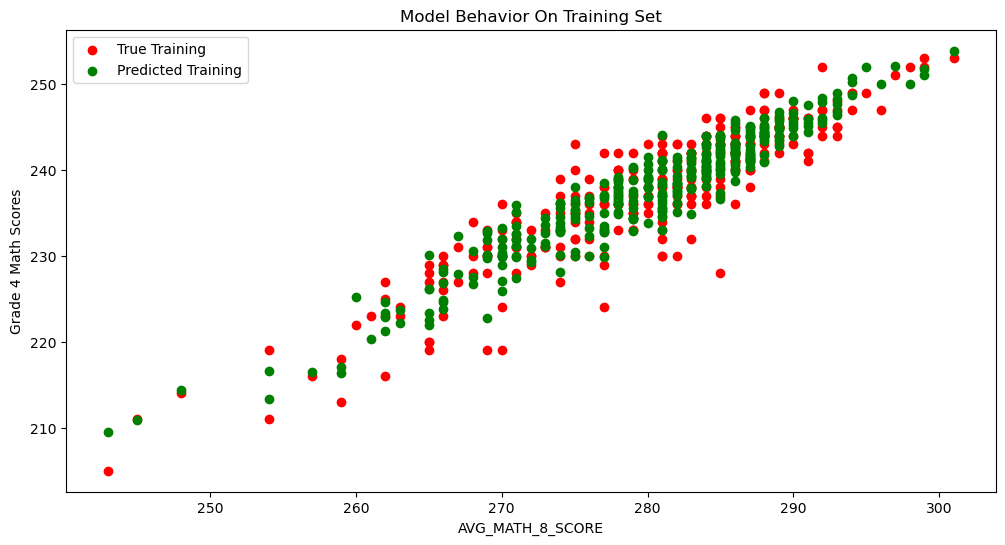

In [72]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Scores')
plt.title("Model Behavior On Training Set")

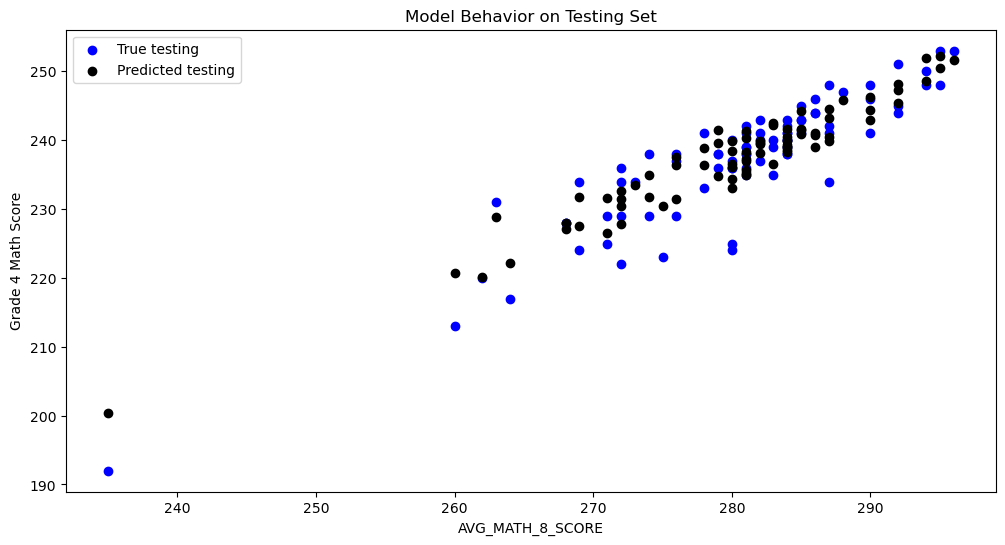

In [71]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title("Model Behavior on Testing Set");

<h2> Summary </h2>

**The model performs poorly, likely due to the amount of features and those that are not scaled. A lot of the performance could be increased with more time into feature engineering. That being said, maybe a more powerful regressor could be used, but again squeezing performance from linear regression would be needed before further evaluation. Using the average 8th grade math score leads to an increased performance. Based on some experimentation, I didn't include this to see what how I would deviate, and it did quite a bit (R^2 = 0.86, MAE = 20ish). That being said, I think this would be some data leakage since we would know the scores at run time ideally, but I'm not completely sure if that is how the data is collected so this sentence is speculation at best.**

**Most of the variables explored don't really have a lot of correlation, and the year min/max approach was more of a stretch in hindsight. Much of the model is more or less defined by the 8th grade score that I chose. Features that were explored and engineered were not really that relevant to the model since training without the 8th grade score was very poor.**